# Libraries

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
import pickle as pkl
from sklearn import decomposition
from sklearn import cluster
from sklearn import metrics
from sklearn import mixture

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

# Input Data

In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

Unnamed: 0        ID Case Number                    Date  \
0     2015825   2508182    HH781001  11/15/2002 12:30:00 PM   
1     2110300   2687361    HJ308830  04/18/2003 06:10:00 PM   
2      381828  10755691    HZ518320  11/16/2016 09:50:00 PM   
3     6048052   8740111    HV415603  08/04/2012 05:15:00 PM   
4     6873402  11924187    JC549979  12/16/2019 04:45:00 PM   

                   Block  IUCR     Primary Type              Description  \
0    003XX N ASHLAND AVE  0810            THEFT                OVER $500   
1        016XX W 18TH ST  0486          BATTERY  DOMESTIC BATTERY SIMPLE   
2     009XX S CICERO AVE  1506     PROSTITUTION    SOLICIT ON PUBLIC WAY   
3  072XX S INGLESIDE AVE  0460          BATTERY                   SIMPLE   
4      017XX W THOME AVE  1310  CRIMINAL DAMAGE              TO PROPERTY   

  Location Description  Arrest  Domestic  Beat  District  Ward  \
0               STREET   False     False  1333      12.0  27.0   
1             SIDEWALK   False      True  1222      12.0  25.0   
2               STREET    True     False  1131      11.0  24.0   
3                OTHER   False     False   324       3.0   5.0   
4            APARTMENT   False     False  2433      24.0  40.0   

   Community Area FBI Code  X Coordinate  Y Coordinate  Year  \
0            28.0       06     1165667.0     1902638.0  2002   
1            31.0      08B     1165650.0     1891466.0  2003   
2            25.0       16     1144531.0     1895566.0  2016   
3            69.0      08B     1183801.0     1857416.0  2012   
4            77.0       14     1163394.0     1941667.0  2019   

               Updated On   Latitude  Longitude                       Location  
0  02/28/2018 03:56:25 PM  41.888430 -87.667064  (41.888429628, -87.667063831)  
1  02/10/2018 03:50:01 PM  41.857773 -87.667445  (41.857773091, -87.667444544)  
2  02/10/2018 03:50:01 PM  41.869447 -87.744861  (41.869447309, -87.744861466)  
3  02/04/2016 06:33:39 AM  41.763932 -87.601884  (41.763931739, -87.601884055)  
4  12/23/2019 03:56:38 PM  41.995575 -87.674309  (41.995575459, -87.674309158)

In [ ]:
# data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   ID                    100000 non-null  int64  
 2   Case Number           100000 non-null  object 
 3   Date                  100000 non-null  object 
 4   Block                 100000 non-null  object 
 5   IUCR                  100000 non-null  object 
 6   Primary Type          100000 non-null  object 
 7   Description           100000 non-null  object 
 8   Location Description  100000 non-null  object 
 9   Arrest                100000 non-null  bool   
 10  Domestic              100000 non-null  bool   
 11  Beat                  100000 non-null  int64  
 12  District              100000 non-null  float64
 13  Ward                  100000 non-null  float64
 14  Community Area        100000 non-null  float64
 15  F

In [ ]:
# stat summary
df.describe()

Unnamed: 0            ID          Beat       District           Ward  \
count  1.000000e+05  1.000000e+05  100000.00000  100000.000000  100000.000000   
mean   3.816456e+06  7.109064e+06    1184.04701      11.289060      22.666100   
std    2.062735e+06  3.050245e+06     701.25252       6.932335      13.842239   
min    2.000000e+01  6.670000e+02     111.00000       1.000000       1.000000   
25%    2.248785e+06  4.400725e+06     622.00000       6.000000      10.000000   
50%    3.907453e+06  7.131744e+06    1033.00000      10.000000      22.000000   
75%    5.565648e+06  9.765134e+06    1724.00000      17.000000      34.000000   
max    7.295508e+06  1.231835e+07    2535.00000      31.000000      50.000000   

       Community Area  X Coordinate  Y Coordinate           Year  \
count   100000.000000  1.000000e+05  1.000000e+05  100000.000000   
mean        37.606040  1.164563e+06  1.885634e+06    2009.902980   
std         21.558465  1.618725e+04  3.137619e+04       5.328429   
min          1.000000  1.095120e+06  1.813910e+06    2001.000000   
25%         23.000000  1.152897e+06  1.858914e+06    2005.000000   
50%         32.000000  1.165989e+06  1.890402e+06    2009.000000   
75%         58.000000  1.176363e+06  1.909042e+06    2014.000000   
max         77.000000  1.205116e+06  1.951503e+06    2021.000000   

            Latitude      Longitude  
count  100000.000000  100000.000000  
mean       41.841777     -87.671642  
std         0.086290       0.058913  
min        41.644608     -87.925509  
25%        41.768308     -87.714015  
50%        41.854947     -87.666191  
75%        41.906276     -87.628291  
max        42.022536     -87.524529

In [ ]:
df.describe(include='O')

Case Number                    Date             Block    IUCR  \
count       100000                  100000            100000  100000   
unique      100000                   94848             22902     321   
top       HH781001  01/01/2003 12:00:00 AM  001XX N STATE ST    0486   
freq             1                       6               199    8650   

       Primary Type Description Location Description FBI Code  \
count        100000      100000               100000   100000   
unique           31         377                  149       26   
top           THEFT      SIMPLE               STREET       06   
freq          20938       11033                25550    20938   

                    Updated On                       Location  
count                   100000                         100000  
unique                    1767                          70915  
top     02/10/2018 03:50:01 PM  (41.976290414, -87.905227221)  
freq                     41566                            192

## Missing Values

In [ ]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

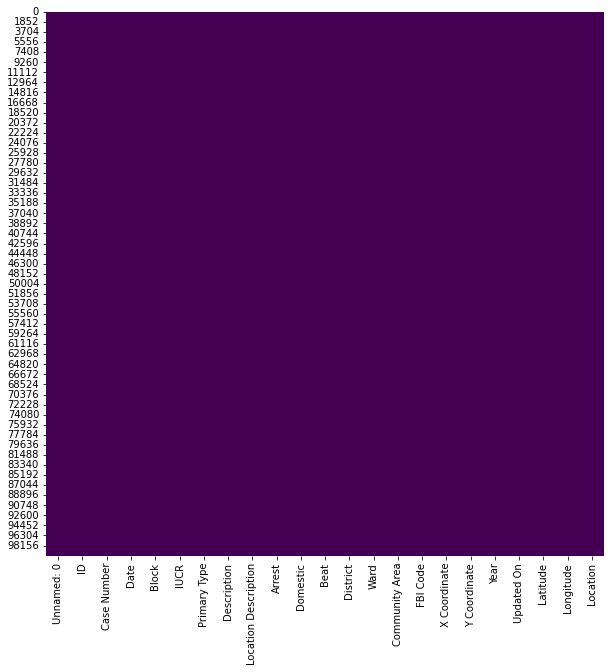

In [ ]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.show()

In [ ]:
for col in df.select_dtypes(include='O'):
    print('_'*40)
    print(col)
    print(df[col].value_counts())

________________________________________
Case Number
HH781001    1
HV436582    1
JB239563    1
HH593544    1
HT423323    1
           ..
HP467868    1
JC489905    1
HJ481484    1
HS278062    1
HP484827    1
Name: Case Number, Length: 100000, dtype: int64
________________________________________
Date
01/01/2003 12:00:00 AM    6
06/18/2002 11:00:00 PM    5
01/01/2008 12:01:00 AM    5
01/01/2006 08:00:00 AM    5
09/28/2014 09:00:00 AM    5
                         ..
06/16/2015 02:40:00 AM    1
06/28/2006 11:00:00 AM    1
05/25/2014 09:30:00 PM    1
06/21/2016 11:00:00 PM    1
08/12/2006 05:29:00 PM    1
Name: Date, Length: 94848, dtype: int64
________________________________________
Block
001XX N STATE ST          199
100XX W OHARE ST          192
076XX S CICERO AVE        143
008XX N MICHIGAN AVE      143
0000X N STATE ST          109
                         ... 
097XX S MUSKEGON AVE        1
023XX N CANNON DR           1
022XX N LEAMINGTON AVE      1
057XX W LAKE ST             1
042X

In [ ]:
# IDs are specific to each row.
len(df['ID'].unique())

100000

In [ ]:
# Unnamed: 0 are specific to each row.
len(df['Unnamed: 0'].unique())

100000

## Manual Feature Engineering & Preprocessing

In [ ]:
# Make features from Date and Updated On
df['Date'] = pd.to_datetime(df['Date'])
df['Updated On'] = pd.to_datetime(df['Updated On'])

df['Date Hour'] = df['Date'].dt.hour
df['Date Day'] = df['Date'].dt.day
df['Date Week'] = df['Date'].dt.isocalendar().week
df['Date Month'] = df['Date'].dt.month
df['Date Year'] = df['Date'].dt.year
df['Date DayofWeek'] = df['Date'].dt.dayofweek
df.drop(['Year', 'Location'], axis=1, inplace=True)

df['Updated On Hour'] = df['Updated On'].dt.hour
df['Updated On Day'] = df['Updated On'].dt.day
df['Updated On Week'] = df['Updated On'].dt.isocalendar().week
df['Updated On Month'] = df['Updated On'].dt.month
df['Updated On Year'] = df['Updated On'].dt.year
df['Updated On DayofWeek'] = df['Updated On'].dt.dayofweek

df.head()

Unnamed: 0        ID Case Number                Date  \
0     2015825   2508182    HH781001 2002-11-15 12:30:00   
1     2110300   2687361    HJ308830 2003-04-18 18:10:00   
2      381828  10755691    HZ518320 2016-11-16 21:50:00   
3     6048052   8740111    HV415603 2012-08-04 17:15:00   
4     6873402  11924187    JC549979 2019-12-16 16:45:00   

                   Block  IUCR     Primary Type              Description  \
0    003XX N ASHLAND AVE  0810            THEFT                OVER $500   
1        016XX W 18TH ST  0486          BATTERY  DOMESTIC BATTERY SIMPLE   
2     009XX S CICERO AVE  1506     PROSTITUTION    SOLICIT ON PUBLIC WAY   
3  072XX S INGLESIDE AVE  0460          BATTERY                   SIMPLE   
4      017XX W THOME AVE  1310  CRIMINAL DAMAGE              TO PROPERTY   

  Location Description  Arrest  Domestic  Beat  District  Ward  \
0               STREET   False     False  1333      12.0  27.0   
1             SIDEWALK   False      True  1222      12.0  25.0   
2               STREET    True     False  1131      11.0  24.0   
3                OTHER   False     False   324       3.0   5.0   
4            APARTMENT   False     False  2433      24.0  40.0   

   Community Area FBI Code  X Coordinate  Y Coordinate          Updated On  \
0            28.0       06     1165667.0     1902638.0 2018-02-28 15:56:25   
1            31.0      08B     1165650.0     1891466.0 2018-02-10 15:50:01   
2            25.0       16     1144531.0     1895566.0 2018-02-10 15:50:01   
3            69.0      08B     1183801.0     1857416.0 2016-02-04 06:33:39   
4            77.0       14     1163394.0     1941667.0 2019-12-23 15:56:38   

    Latitude  Longitude  Date Hour  Date Day  Date Week  Date Month  \
0  41.888430 -87.667064         12        15         46          11   
1  41.857773 -87.667445         18        18         16           4   
2  41.869447 -87.744861         21        16         46          11   
3  41.763932 -87.601884         17         4         31           8   
4  41.995575 -87.674309         16        16         51          12   

   Date Year  Date DayofWeek  Updated On Hour  Updated On Day  \
0       2002               4               15              28   
1       2003               4               15              10   
2       2016               2               15              10   
3       2012               5                6               4   
4       2019               0               15              23   

   Updated On Week  Updated On Month  Updated On Year  Updated On DayofWeek  
0                9                 2             2018                     2  
1                6                 2             2018                     5  
2                6                 2             2018                     5  
3                5                 2             2016                     3  
4               52                12             2019                     0

In [ ]:
# Make features on Block 
df['Block Name'] = df['Block'].apply(lambda x: x[8:])
df['Block Direction'] = df['Block'].apply(lambda x: x[6:7])

df['Case Initial'] = df['Case Number'].apply(lambda x: x[:2])
df.head()

Unnamed: 0        ID Case Number                Date  \
0     2015825   2508182    HH781001 2002-11-15 12:30:00   
1     2110300   2687361    HJ308830 2003-04-18 18:10:00   
2      381828  10755691    HZ518320 2016-11-16 21:50:00   
3     6048052   8740111    HV415603 2012-08-04 17:15:00   
4     6873402  11924187    JC549979 2019-12-16 16:45:00   

                   Block  IUCR     Primary Type              Description  \
0    003XX N ASHLAND AVE  0810            THEFT                OVER $500   
1        016XX W 18TH ST  0486          BATTERY  DOMESTIC BATTERY SIMPLE   
2     009XX S CICERO AVE  1506     PROSTITUTION    SOLICIT ON PUBLIC WAY   
3  072XX S INGLESIDE AVE  0460          BATTERY                   SIMPLE   
4      017XX W THOME AVE  1310  CRIMINAL DAMAGE              TO PROPERTY   

  Location Description  Arrest  Domestic  Beat  District  Ward  \
0               STREET   False     False  1333      12.0  27.0   
1             SIDEWALK   False      True  1222      12.0  25.0   
2               STREET    True     False  1131      11.0  24.0   
3                OTHER   False     False   324       3.0   5.0   
4            APARTMENT   False     False  2433      24.0  40.0   

   Community Area FBI Code  X Coordinate  Y Coordinate          Updated On  \
0            28.0       06     1165667.0     1902638.0 2018-02-28 15:56:25   
1            31.0      08B     1165650.0     1891466.0 2018-02-10 15:50:01   
2            25.0       16     1144531.0     1895566.0 2018-02-10 15:50:01   
3            69.0      08B     1183801.0     1857416.0 2016-02-04 06:33:39   
4            77.0       14     1163394.0     1941667.0 2019-12-23 15:56:38   

    Latitude  Longitude  Date Hour  Date Day  Date Week  Date Month  \
0  41.888430 -87.667064         12        15         46          11   
1  41.857773 -87.667445         18        18         16           4   
2  41.869447 -87.744861         21        16         46          11   
3  41.763932 -87.601884         17         4         31           8   
4  41.995575 -87.674309         16        16         51          12   

   Date Year  Date DayofWeek  Updated On Hour  Updated On Day  \
0       2002               4               15              28   
1       2003               4               15              10   
2       2016               2               15              10   
3       2012               5                6               4   
4       2019               0               15              23   

   Updated On Week  Updated On Month  Updated On Year  Updated On DayofWeek  \
0                9                 2             2018                     2   
1                6                 2             2018                     5   
2                6                 2             2018                     5   
3                5                 2             2016                     3   
4               52                12             2019                     0   

      Block Name Block Direction Case Initial  
0    ASHLAND AVE               N           HH  
1        18TH ST               W           HJ  
2     CICERO AVE               S           HZ  
3  INGLESIDE AVE               S           HV  
4      THOME AVE               W           JC

In [ ]:
# Cluster the locations
wrd_arr = ['AIRPORT', 'BOAT', 'CHA', 'CHURCH', 'COLLEGE', 'CTA', 'DRIVEWAY', 'FACTORY', 'GAS STATION', 'GOVERNMENT BUILDING', 'HIGHWAY', 'HOSPITAL', 'HOTEL', 'JAIL', 'LAKE', 'LAUNDRY', 'MOVIE', 'PARKING LOT', 'POLICE FACILITY', 'RESIDENCE', 'RETIREMENT HOME', 'SCHOOL', 'SHOP', 'STORE', 'VACANT LOT', 'VEHICLE']
for wrd in wrd_arr:
    df['Location Description'] = df['Location Description'].apply(lambda x: wrd if  wrd in x else x)

df['Location Description'] = df['Location Description'].apply(lambda x: 'RESIDENCE' if  'RESIDENTIAL' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'RESIDENCE' if  'HOUSE' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'OTHER' if  'OTHER' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'BAR' if  'BAR' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'ATM' if  'ATM' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'HOSPITAL' if  'MEDICAL' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'CLUB' if  'CLUB' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'FEDERAL' if  'FEDERAL' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'STADIUM' if  'STADIUM' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'STORE' if  'SHOP' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'VEHICLE' if  'AUTO' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'VEHICLE' if  'TAXI' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'VEHICLE' if  'TRUCK' in x else x)
df.loc[df.groupby('Location Description')['Location Description'].transform('count').lt(5), 'Location Description'] = 'OTHER'

In [ ]:
df.head()

Unnamed: 0        ID Case Number                Date  \
0     2015825   2508182    HH781001 2002-11-15 12:30:00   
1     2110300   2687361    HJ308830 2003-04-18 18:10:00   
2      381828  10755691    HZ518320 2016-11-16 21:50:00   
3     6048052   8740111    HV415603 2012-08-04 17:15:00   
4     6873402  11924187    JC549979 2019-12-16 16:45:00   

                   Block  IUCR     Primary Type              Description  \
0    003XX N ASHLAND AVE  0810            THEFT                OVER $500   
1        016XX W 18TH ST  0486          BATTERY  DOMESTIC BATTERY SIMPLE   
2     009XX S CICERO AVE  1506     PROSTITUTION    SOLICIT ON PUBLIC WAY   
3  072XX S INGLESIDE AVE  0460          BATTERY                   SIMPLE   
4      017XX W THOME AVE  1310  CRIMINAL DAMAGE              TO PROPERTY   

  Location Description  Arrest  Domestic  Beat  District  Ward  \
0               STREET   False     False  1333      12.0  27.0   
1             SIDEWALK   False      True  1222      12.0  25.0   
2               STREET    True     False  1131      11.0  24.0   
3                OTHER   False     False   324       3.0   5.0   
4            APARTMENT   False     False  2433      24.0  40.0   

   Community Area FBI Code  X Coordinate  Y Coordinate          Updated On  \
0            28.0       06     1165667.0     1902638.0 2018-02-28 15:56:25   
1            31.0      08B     1165650.0     1891466.0 2018-02-10 15:50:01   
2            25.0       16     1144531.0     1895566.0 2018-02-10 15:50:01   
3            69.0      08B     1183801.0     1857416.0 2016-02-04 06:33:39   
4            77.0       14     1163394.0     1941667.0 2019-12-23 15:56:38   

    Latitude  Longitude  Date Hour  Date Day  Date Week  Date Month  \
0  41.888430 -87.667064         12        15         46          11   
1  41.857773 -87.667445         18        18         16           4   
2  41.869447 -87.744861         21        16         46          11   
3  41.763932 -87.601884         17         4         31           8   
4  41.995575 -87.674309         16        16         51          12   

   Date Year  Date DayofWeek  Updated On Hour  Updated On Day  \
0       2002               4               15              28   
1       2003               4               15              10   
2       2016               2               15              10   
3       2012               5                6               4   
4       2019               0               15              23   

   Updated On Week  Updated On Month  Updated On Year  Updated On DayofWeek  \
0                9                 2             2018                     2   
1                6                 2             2018                     5   
2                6                 2             2018                     5   
3                5                 2             2016                     3   
4               52                12             2019                     0   

      Block Name Block Direction Case Initial  
0    ASHLAND AVE               N           HH  
1        18TH ST               W           HJ  
2     CICERO AVE               S           HZ  
3  INGLESIDE AVE               S           HV  
4      THOME AVE               W           JC

In [ ]:
df['Primary Type'].value_counts()

THEFT                                20938
BATTERY                              18417
CRIMINAL DAMAGE                      11573
NARCOTICS                             9845
ASSAULT                               6448
OTHER OFFENSE                         6172
BURGLARY                              5692
MOTOR VEHICLE THEFT                   4460
DECEPTIVE PRACTICE                    4322
ROBBERY                               3784
CRIMINAL TRESPASS                     2860
WEAPONS VIOLATION                     1245
PROSTITUTION                           974
PUBLIC PEACE VIOLATION                 721
OFFENSE INVOLVING CHILDREN             651
CRIM SEXUAL ASSAULT                    378
SEX OFFENSE                            356
INTERFERENCE WITH PUBLIC OFFICER       253
GAMBLING                               183
ARSON                                  182
LIQUOR LAW VIOLATION                   164
HOMICIDE                               147
KIDNAPPING                              79
INTIMIDATIO

In [ ]:
# CLuster similar Primary type
df['Primary Type'] = df['Primary Type'].apply(lambda x: 'CRIMINAL SEXUAL ASSAULT' if  'SEXUAL ASSAULT' in x else x)
df['Primary Type'] = df['Primary Type'].apply(lambda x: 'OTHER OFFENSE' if  'NON - CRIMINAL' in x else x)
df['Primary Type'] = df['Primary Type'].apply(lambda x: 'OTHER OFFENSE' if  'HUMAN' in x else x)
df['Primary Type'] = df['Primary Type'].apply(lambda x: 'PUBLIC INDECENCY' if  'OBSCENITY' in x else x)

In [ ]:
# Binarise the Arrest and Domestic
df['Arrest'] = df['Arrest'].map({False:0, True:1}).astype(int)
df['Domestic'] = df['Domestic'].map({False:0, True:1}).astype(int)

In [ ]:
# Day Night Column
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
df['Session'] = pd.cut(df['Date Hour'], bins=b, labels=l, include_lowest=True)

In [ ]:
# Delete irrelevant columns
df.drop(['Unnamed: 0', 'ID', 'Case Number'], axis=1, inplace=True)
df.drop(['Date', 'Updated On'], axis=1, inplace=True)
df.drop(['Block'], axis=1, inplace=True)

In [ ]:
df.head()

IUCR     Primary Type              Description Location Description  \
0  0810            THEFT                OVER $500               STREET   
1  0486          BATTERY  DOMESTIC BATTERY SIMPLE             SIDEWALK   
2  1506     PROSTITUTION    SOLICIT ON PUBLIC WAY               STREET   
3  0460          BATTERY                   SIMPLE                OTHER   
4  1310  CRIMINAL DAMAGE              TO PROPERTY            APARTMENT   

   Arrest  Domestic  Beat  District  Ward  Community Area FBI Code  \
0       0         0  1333      12.0  27.0            28.0       06   
1       0         1  1222      12.0  25.0            31.0      08B   
2       1         0  1131      11.0  24.0            25.0       16   
3       0         0   324       3.0   5.0            69.0      08B   
4       0         0  2433      24.0  40.0            77.0       14   

   X Coordinate  Y Coordinate   Latitude  Longitude  Date Hour  Date Day  \
0     1165667.0     1902638.0  41.888430 -87.667064         12        15   
1     1165650.0     1891466.0  41.857773 -87.667445         18        18   
2     1144531.0     1895566.0  41.869447 -87.744861         21        16   
3     1183801.0     1857416.0  41.763932 -87.601884         17         4   
4     1163394.0     1941667.0  41.995575 -87.674309         16        16   

   Date Week  Date Month  Date Year  Date DayofWeek  Updated On Hour  \
0         46          11       2002               4               15   
1         16           4       2003               4               15   
2         46          11       2016               2               15   
3         31           8       2012               5                6   
4         51          12       2019               0               15   

   Updated On Day  Updated On Week  Updated On Month  Updated On Year  \
0              28                9                 2             2018   
1              10                6                 2             2018   
2              10                6                 2             2018   
3               4                5                 2             2016   
4              23               52                12             2019   

   Updated On DayofWeek     Block Name Block Direction Case Initial  Session  
0                     2    ASHLAND AVE               N           HH  Morning  
1                     5        18TH ST               W           HJ  Evening  
2                     5     CICERO AVE               S           HZ    Night  
3                     3  INGLESIDE AVE               S           HV  Evening  
4                     0      THOME AVE               W           JC     Noon

In [ ]:
df.to_csv('prep_data.csv', index=False)

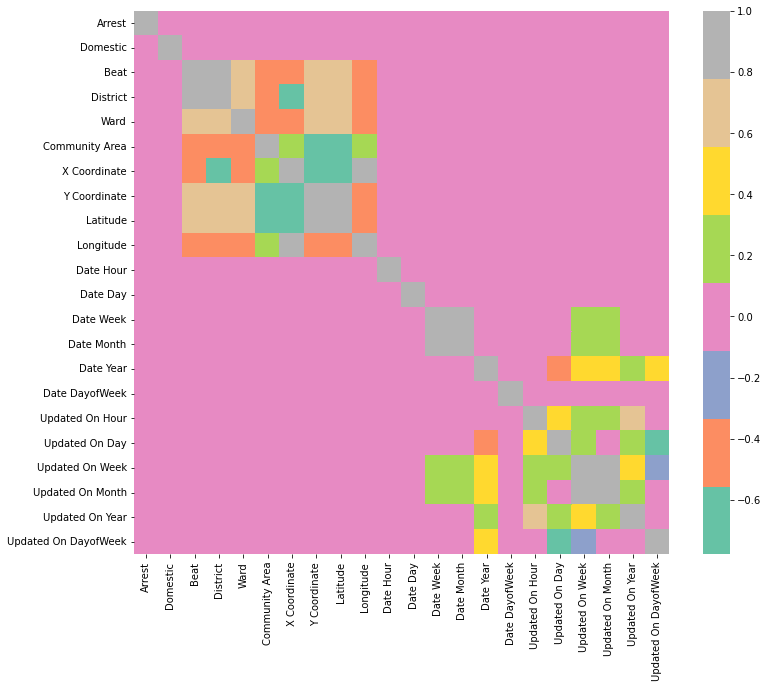

In [ ]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Set2')

In [ ]:
df.select_dtypes(include='O').columns

Index(['IUCR', 'Primary Type', 'Description', 'Location Description',
       'FBI Code', 'Block Name', 'Block Direction', 'Case Initial'],
      dtype='object')

### Save classes for Label Encoder

In [ ]:
for col in ['IUCR', 'Primary Type', 'Description']:
    lbl = preprocessing.LabelEncoder()
    df[col] = lbl.fit_transform(df[col])
    # output = open(f'../model/{col}.pkl', 'wb')
    # pkl.dump(lbl, output)
    # output.close()

### OHE and Label Encoder

In [ ]:
"""for col in ['IUCR', 'Primary Type', 'Description', 'Block Name']:
    jb_file = open(f'../model/{col}.pkl', 'rb')
    lbl = pkl.load(jb_file) 
    jb_file.close()
    X_train[col] = lbl.transform(X_train[col])"""
X_train = pd.get_dummies(df)
X_train.head()

IUCR  Primary Type  Description  Arrest  Domestic  Beat  District  Ward  \
0    74            25          238       0         0  1333      12.0  27.0   
1    44             2          137       0         1  1222      12.0  25.0   
2   159            19          315       1         0  1131      11.0  24.0   
3    34             2          309       0         0   324       3.0   5.0   
4   133             5          338       0         0  2433      24.0  40.0   

   Community Area  X Coordinate  Y Coordinate   Latitude  Longitude  \
0            28.0     1165667.0     1902638.0  41.888430 -87.667064   
1            31.0     1165650.0     1891466.0  41.857773 -87.667445   
2            25.0     1144531.0     1895566.0  41.869447 -87.744861   
3            69.0     1183801.0     1857416.0  41.763932 -87.601884   
4            77.0     1163394.0     1941667.0  41.995575 -87.674309   

   Date Hour  Date Day  Date Week  Date Month  Date Year  Date DayofWeek  \
0         12        15         46          11       2002               4   
1         18        18         16           4       2003               4   
2         21        16         46          11       2016               2   
3         17         4         31           8       2012               5   
4         16        16         51          12       2019               0   

   Updated On Hour  Updated On Day  Updated On Week  Updated On Month  \
0               15              28                9                 2   
1               15              10                6                 2   
2               15              10                6                 2   
3                6               4                5                 2   
4               15              23               52                12   

   Updated On Year  Updated On DayofWeek  \
0             2018                     2   
1             2018                     5   
2             2018                     5   
3             2016                     3   
4             2019                     0   

   Location Description_ABANDONED BUILDING  Location Description_AIRCRAFT  \
0                                        0                              0   
1                                        0                              0   
2                                        0                              0   
3                                        0                              0   
4                                        0                              0   

   Location Description_AIRPORT  Location Description_ALLEY  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   

   Location Description_APARTMENT  Location Description_ATM  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               1                         0   

   Location Description_BANK  Location Description_BAR  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   Location Description_BOAT  Location Description_BOWLING ALLEY  \
0                          0                                   0   
1                          0                                   0   
2                          0                                   0   
3                          0                                   0   
4                          0        

In [ ]:
y_train = X_train['Primary Type']
X_train = X_train.drop(['Primary Type'], axis=1)

### MinMax Scaler

In [ ]:
scl = preprocessing.MinMaxScaler()
scl.fit(X_train)
X_train = scl.transform(X_train)

### PCA 

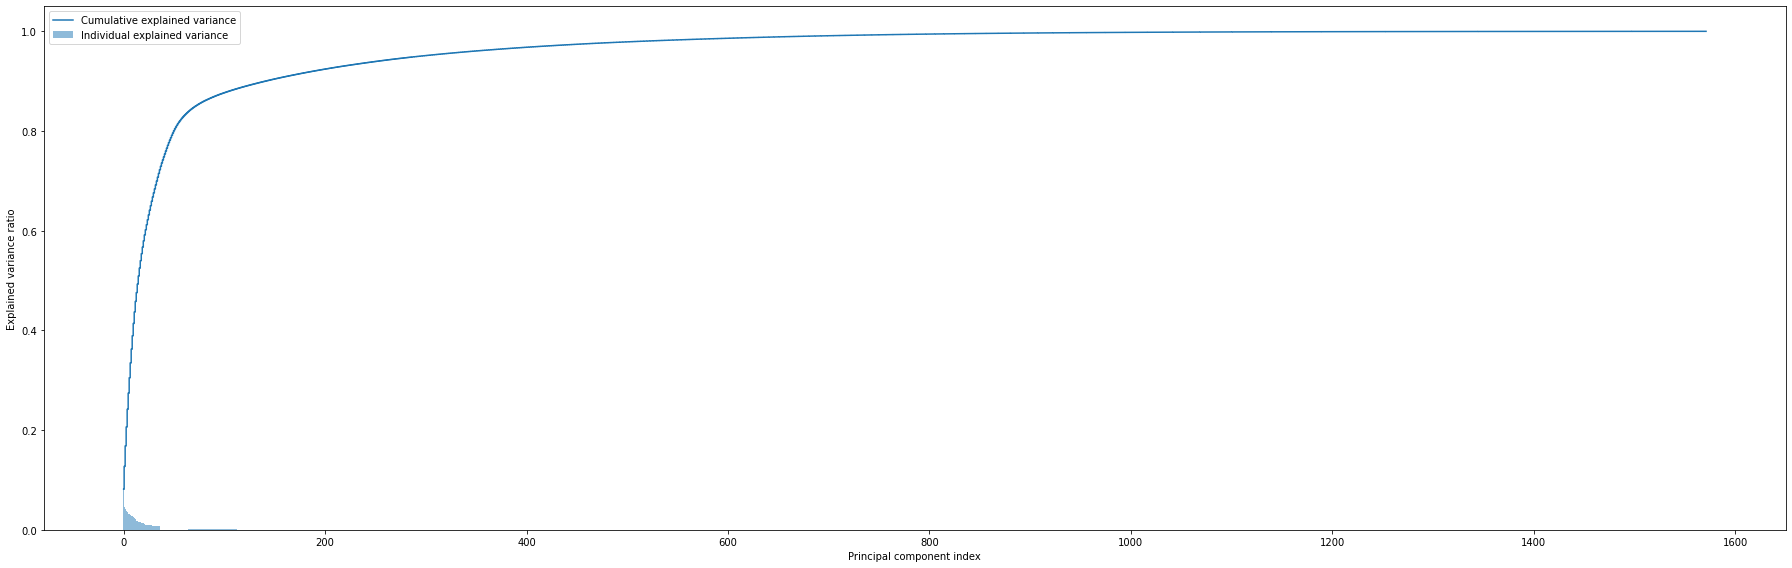

In [ ]:
pca = decomposition.PCA()
# Determine transformed features
pca.fit(X_train)
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.figure(figsize=(25, 8))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# Index from where the value crosses 0.xx
print("Index from where the value crosses 0.70:",next(x[0] for x in enumerate(list(cum_sum_eigenvalues)) if x[1] > 0.70),"\n")
print("Index from where the value crosses 0.75:",next(x[0] for x in enumerate(list(cum_sum_eigenvalues)) if x[1] > 0.75),"\n")
print("Index from where the value crosses 0.85:",next(x[0] for x in enumerate(list(cum_sum_eigenvalues)) if x[1] > 0.85),"\n")
print("Index from where the value crosses 0.9:",next(x[0] for x in enumerate(list(cum_sum_eigenvalues)) if x[1] > 0.9),"\n")
print("Index from where the value crosses 0.91:",next(x[0] for x in enumerate(list(cum_sum_eigenvalues)) if x[1] > 0.91),"\n")
print("Index from where the value crosses 0.93:",next(x[0] for x in enumerate(list(cum_sum_eigenvalues)) if x[1] > 0.93),"\n")
print("Index from where the value crosses 0.95:",next(x[0] for x in enumerate(list(cum_sum_eigenvalues)) if x[1] > 0.95),"\n")
print("Index from where the value crosses 0.99:",next(x[0] for x in enumerate(list(cum_sum_eigenvalues)) if x[1] > 0.99),"\n")

Index from where the value crosses 0.70: 34 

Index from where the value crosses 0.75: 41 

Index from where the value crosses 0.85: 72 

Index from where the value crosses 0.9: 141 

Index from where the value crosses 0.91: 163 

Index from where the value crosses 0.93: 218 

Index from where the value crosses 0.95: 294 

Index from where the value crosses 0.99: 674 



In [ ]:
pca = decomposition.PCA(n_components=2)
# Determine transformed features
X_train_pca_2 = pca.fit_transform(X_train)
X_train_pca_2.shape

(100000, 2)

In [ ]:
pca = decomposition.PCA(n_components=70)
# Determine transformed features
X_train_pca_70 = pca.fit_transform(X_train)
X_train_pca_70.shape

(100000, 70)

## For 2 PCA Features

### Birch with MiniBatchKMeans

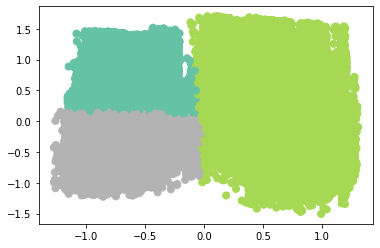

In [ ]:
# Birch with MiniBatchKMeans as global cluster
brc = cluster.Birch(n_clusters=cluster.MiniBatchKMeans(n_clusters=4))
brc.fit(X_train_pca_2)
brc_pred = brc.predict(X_train_pca_2)
# Plot the data
plt.scatter(X_train_pca_2[:,0], 
            X_train_pca_2[:,1],
            c=brc_pred,
            s=50, cmap='Set2')
plt.show()

In [ ]:
# Birch Model
metrics.normalized_mutual_info_score(y_train, brc_pred)

0.05748634760384781

### Standalone MiniBatchKMeans

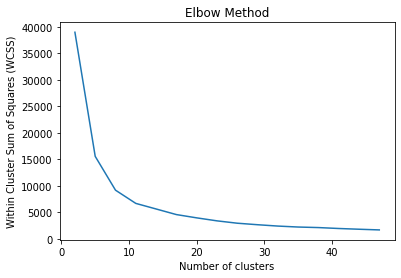

In [ ]:
# Determine optimal cluster number with elbow method
wcss = []

for i in range(2, 50, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_train_pca_2)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 50, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

0.12610223416905245


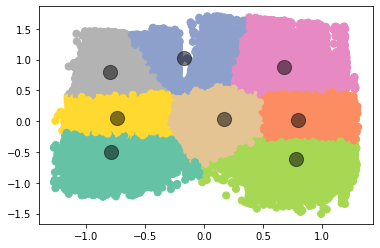

In [ ]:
# MiniBatchKmeans
mbkmeans = cluster.MiniBatchKMeans(n_clusters=8, random_state=42)
mbkmeans.fit(X_train_pca_2)
mbk_pred = mbkmeans.predict(X_train_pca_2)
# Kmeans Model
print(metrics.normalized_mutual_info_score(y_train, mbk_pred))
plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c=mbk_pred, s=50, cmap='Set2')
centers = mbkmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

0.12321263278730182


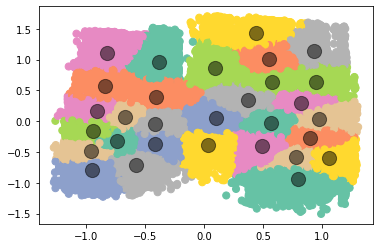

In [ ]:
# MiniBatchKmeans
mbkmeans = cluster.MiniBatchKMeans(n_clusters=30, random_state=42)
mbkmeans.fit(X_train_pca_2)
mbk_pred = mbkmeans.predict(X_train_pca_2)
# Kmeans Model
print(metrics.normalized_mutual_info_score(y_train, mbk_pred))
plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c=mbk_pred, s=50, cmap='Set2')
centers = mbkmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

0.13077654607466913


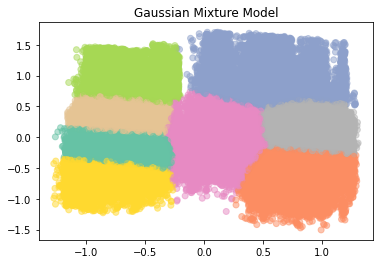

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 8)
gmm.fit(X_train_pca_2)
gmm_labels = gmm.predict(X_train_pca_2)
# GMM Model
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.12783420623354613


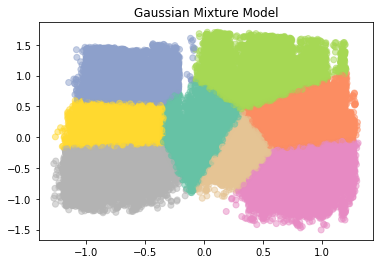

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 8, covariance_type='tied')
gmm.fit(X_train_pca_2)
gmm_labels = gmm.predict(X_train_pca_2)
# GMM Model
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.12197041089335725


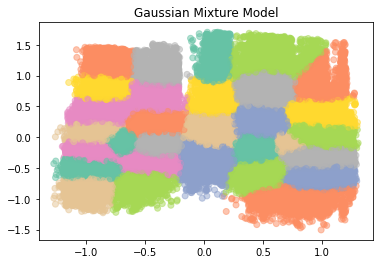

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 30)
gmm.fit(X_train_pca_2)
gmm_labels = gmm.predict(X_train_pca_2)
# GMM Model
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.12504840968127667


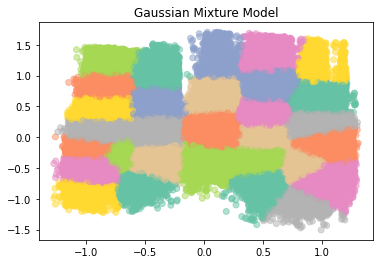

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 30, covariance_type='tied')
gmm.fit(X_train_pca_2)
gmm_labels = gmm.predict(X_train_pca_2)
# GMM Model
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

### For 70 PCA Features

### Birch with MiniBatchKMeans

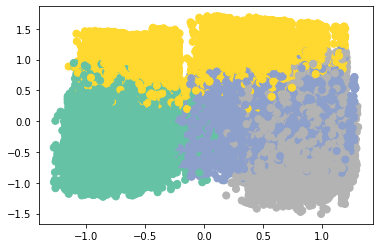

In [ ]:
# Birch with MiniBatchKMeans as global cluster
brc = cluster.Birch(n_clusters=cluster.MiniBatchKMeans(n_clusters=4))
brc.fit(X_train_pca_70)
brc_pred = brc.predict(X_train_pca_70)
# Plot the data
plt.scatter(X_train_pca_2[:,0], 
            X_train_pca_2[:,1],
            c=brc_pred,
            s=50, cmap='Set2')
plt.show()

In [ ]:
# Birch Model
metrics.normalized_mutual_info_score(y_train, brc_pred)

0.13943674725928074

### Standalone MiniBatchKMeans

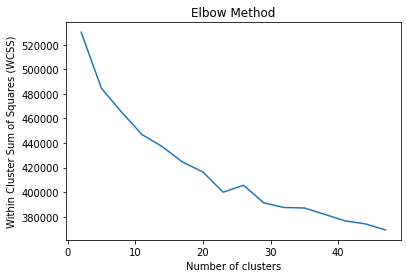

In [ ]:
# Determine optimal cluster number with elbow method
wcss = []

for i in range(2, 50, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_train_pca_70)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 50, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

0.06771815300323938


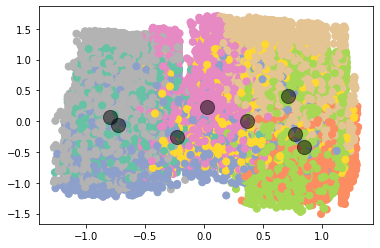

In [ ]:
# MiniBatchKmeans
mbkmeans = cluster.MiniBatchKMeans(n_clusters=8, random_state=42)
mbkmeans.fit(X_train_pca_70)
mbk_pred = mbkmeans.predict(X_train_pca_70)
# Kmeans
print(metrics.normalized_mutual_info_score(y_train, mbk_pred))
plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c=mbk_pred, s=50, cmap='Set2')
centers = mbkmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

0.22198238594413502


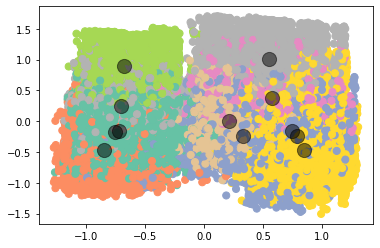

In [ ]:
# MiniBatchKmeans
mbkmeans = cluster.MiniBatchKMeans(n_clusters=12, random_state=42)
mbkmeans.fit(X_train_pca_70)
mbk_pred = mbkmeans.predict(X_train_pca_70)
# Kmeans
print(metrics.normalized_mutual_info_score(y_train, mbk_pred))
plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c=mbk_pred, s=50, cmap='Set2')
centers = mbkmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

0.25715347006934886


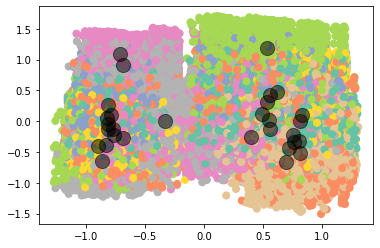

In [ ]:
# MiniBatchKmeans
mbkmeans = cluster.MiniBatchKMeans(n_clusters=30, random_state=42)
mbkmeans.fit(X_train_pca_70)
mbk_pred = mbkmeans.predict(X_train_pca_70)
# Kmeans
print(metrics.normalized_mutual_info_score(y_train, mbk_pred))
plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c=mbk_pred, s=50, cmap='Set2')
centers = mbkmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

0.15661660577895228


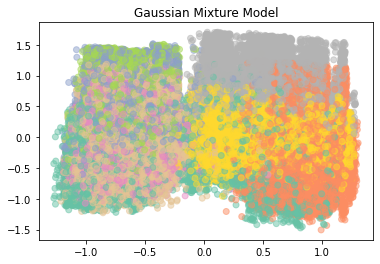

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 8)
gmm.fit(X_train_pca_70)
gmm_labels = gmm.predict(X_train_pca_70)
# GMM
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.scatter(X_train_pca_70[:, 0], X_train_pca_70[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 8, covariance_type='tied')
gmm.fit(X_train_pca_70)
gmm_labels = gmm.predict(X_train_pca_70)
# GMM
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.scatter(X_train_pca_70[:, 0], X_train_pca_70[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.11073427425845893


0.3495690320807805


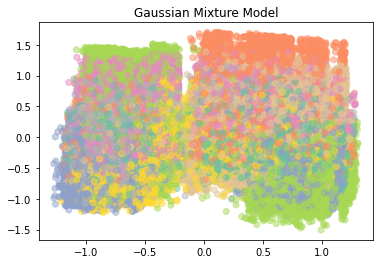

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 30)
gmm.fit(X_train_pca_70)
gmm_labels = gmm.predict(X_train_pca_70)
# GMM
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.scatter(X_train_pca_70[:, 0], X_train_pca_70[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.14830081978453175


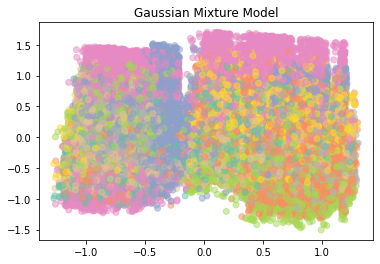

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 30, covariance_type='tied')
gmm.fit(X_train_pca_70)
gmm_labels = gmm.predict(X_train_pca_70)
# GMM
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.scatter(X_train_pca_70[:, 0], X_train_pca_70[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

##Autoencoder

### For 2 Encoded Features

In [ ]:
X_train.shape[1]

1572

In [ ]:
input_df = Input( shape = (X_train.shape[1], ))
x = Dense(500, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(input_df)
x = Dense(100, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)
x = Dense(200, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)
encoded = Dense(2, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)

x = Dense(200, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(encoded)
x = Dense(100, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)
decoded = Dense(X_train.shape[1], kernel_initializer='glorot_uniform')(x)

autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(X_train, X_train, batch_size= 100, epochs = 10, verbose = 1)

Epoch 1/10
1000/1000 [==============================] - 44s 43ms/step - loss: 0.0037
Epoch 2/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0031
Epoch 3/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0030
Epoch 4/10
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0029
Epoch 5/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0028
Epoch 6/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0027
Epoch 7/10
1000/1000 [==============================] - 37s 37ms/step - loss: 0.0027
Epoch 8/10
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0026
Epoch 9/10
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0026
Epoch 10/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0026


In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1572)]            0         
                                                                 
 dense (Dense)               (None, 500)               786500    
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 200)               20200     
                                                                 
 dense_3 (Dense)             (None, 2)                 402       
                                                                 
 dense_4 (Dense)             (None, 200)               600       
                                                                 
 dense_5 (Dense)             (None, 100)               20100 

In [ ]:
pred = encoder.predict(X_train)
pred.shape

(100000, 2)

In [ ]:
pred

array([[-0.67387086,  1.6499732 ],
       [ 2.1361527 ,  0.4301477 ],
       [ 2.4990015 , -1.1149541 ],
       ...,
       [ 2.7342412 ,  1.7488909 ],
       [ 2.2908964 ,  0.6280266 ],
       [ 1.0705116 ,  0.31779948]], dtype=float32)

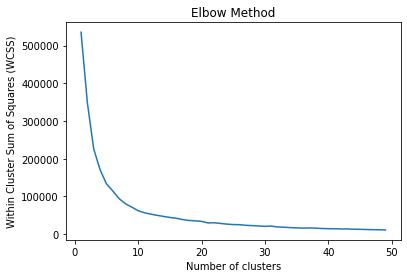

In [ ]:
# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 50):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(pred)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

0.11518632055266788


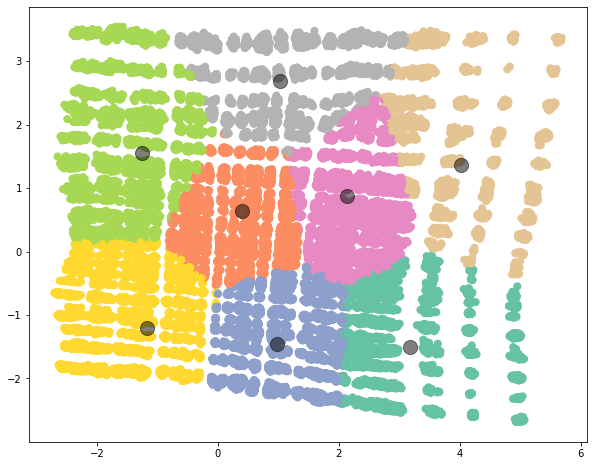

In [ ]:
kmeans = cluster.MiniBatchKMeans(n_clusters = 8,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, pred_y))
# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c=pred_y, s=50, cmap='Set2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

0.15747902223399185


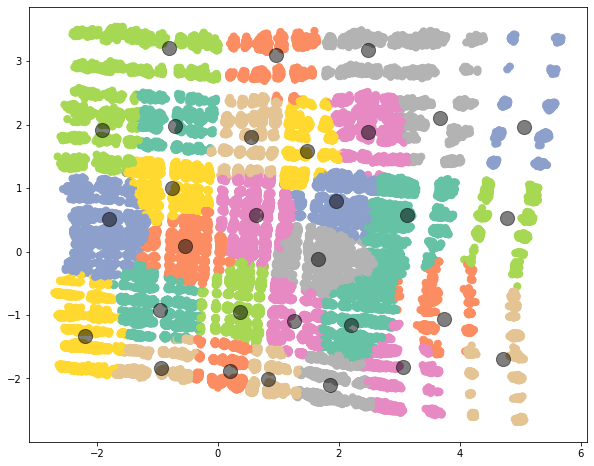

In [ ]:
kmeans = cluster.MiniBatchKMeans(n_clusters = 30,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, pred_y))
# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c=pred_y, s=50, cmap='Set2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#### GMM

0.12591406995454688


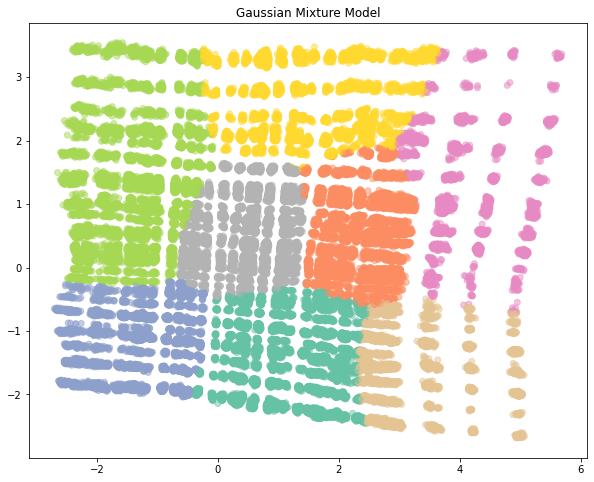

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 8)
gmm.fit(pred)
gmm_labels = gmm.predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.1292927142024107


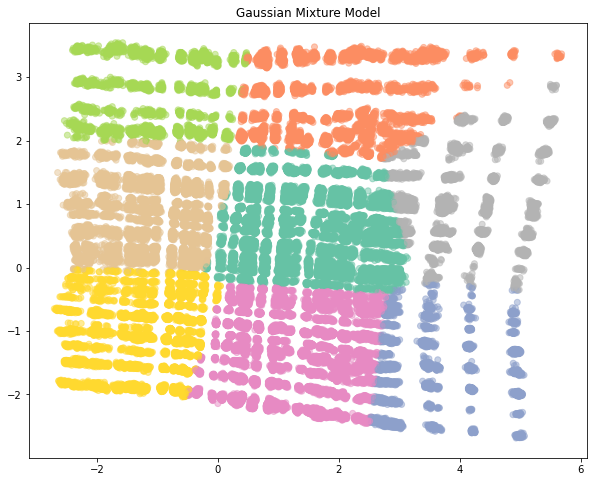

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 8, covariance_type='tied')
gmm.fit(pred)
gmm_labels = gmm.predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 30)
gmm.fit(pred)
gmm_labels = gmm.predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.1703007227551682


0.16945585447814715


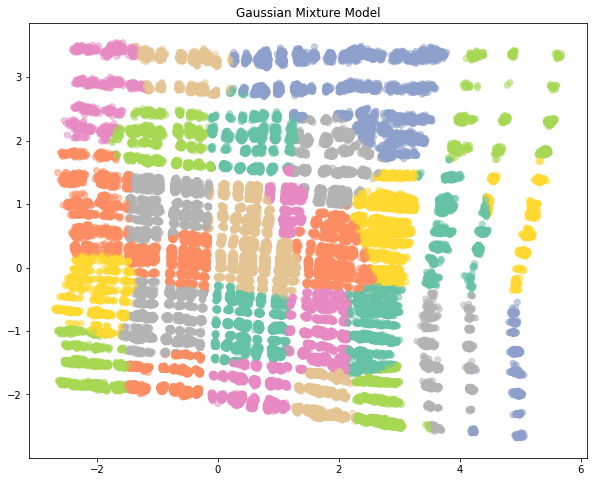

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 30, covariance_type='tied')
gmm.fit(pred)
gmm_labels = gmm.predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

### For 10 Encoded Features

In [ ]:
input_df = Input( shape = (X_train.shape[1], ))
x = Dense(500, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(input_df)
x = Dense(100, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)
x = Dense(200, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)
encoded = Dense(10, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)

x = Dense(200, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(encoded)
x = Dense(100, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)
decoded = Dense(X_train.shape[1], kernel_initializer='glorot_uniform')(x)

autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(X_train, X_train, batch_size= 100, epochs = 10, verbose = 1)

Epoch 1/10
1000/1000 [==============================] - 34s 33ms/step - loss: 0.0026
Epoch 2/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0019
Epoch 3/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0017
Epoch 4/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0016
Epoch 5/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0015
Epoch 6/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0014
Epoch 7/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0014
Epoch 8/10
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0013
Epoch 9/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0012
Epoch 10/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0011


In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1572)]            0         
                                                                 
 dense_8 (Dense)             (None, 500)               786500    
                                                                 
 dense_9 (Dense)             (None, 100)               50100     
                                                                 
 dense_10 (Dense)            (None, 200)               20200     
                                                                 
 dense_11 (Dense)            (None, 10)                2010      
                                                                 
 dense_12 (Dense)            (None, 200)               2200      
                                                                 
 dense_13 (Dense)            (None, 100)               2010

In [ ]:
pred = encoder.predict(X_train)
pred.shape

(100000, 10)

In [ ]:
pred

array([[2.7858815 , 1.0422794 , 1.4600996 , ..., 2.190841  , 1.4466678 ,
        2.5511434 ],
       [1.8794321 , 1.8031819 , 1.4302655 , ..., 0.65294904, 1.0031539 ,
        2.0269818 ],
       [1.5287988 , 1.4391906 , 1.1977006 , ..., 2.9973369 , 1.8711735 ,
        1.5862229 ],
       ...,
       [2.3358319 , 0.8130119 , 0.91278017, ..., 1.8206736 , 1.139612  ,
        2.3937466 ],
       [1.8229277 , 1.8909186 , 2.1324198 , ..., 0.91946864, 1.0483538 ,
        1.3401359 ],
       [2.2775202 , 2.3223548 , 1.7135913 , ..., 0.75328344, 1.3865567 ,
        1.8356899 ]], dtype=float32)

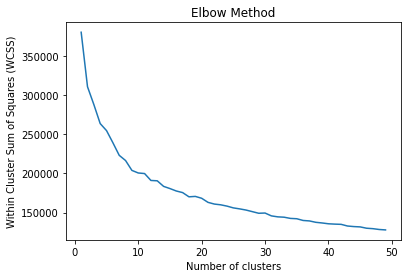

In [ ]:
# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 50):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(pred)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

0.29602730892135853


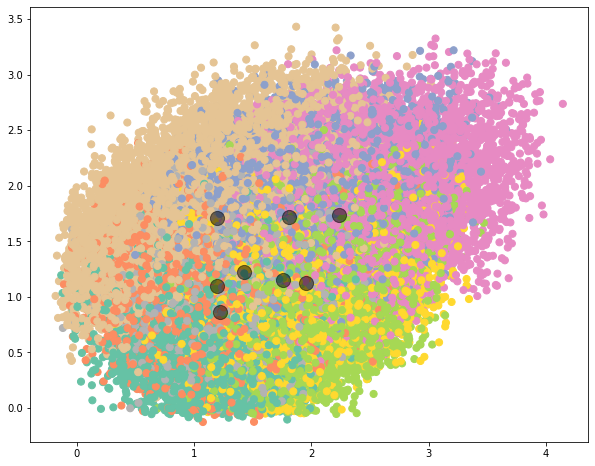

In [ ]:
kmeans = cluster.MiniBatchKMeans(n_clusters = 8,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, pred_y))
# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c=pred_y, s=50, cmap='Set2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

0.26864488521595953


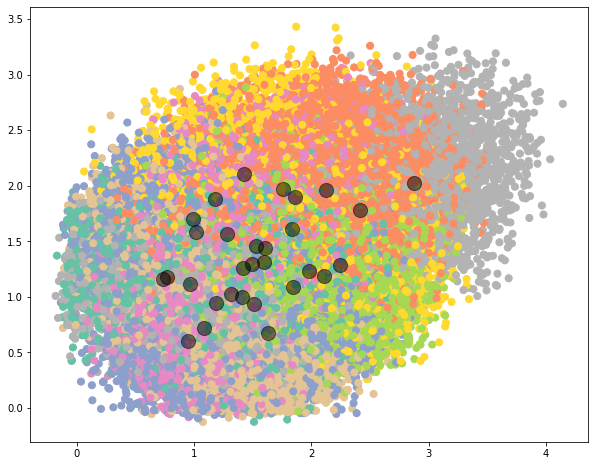

In [ ]:
kmeans = cluster.MiniBatchKMeans(n_clusters = 30,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, pred_y))
# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c=pred_y, s=50, cmap='Set2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

0.3685968541049693


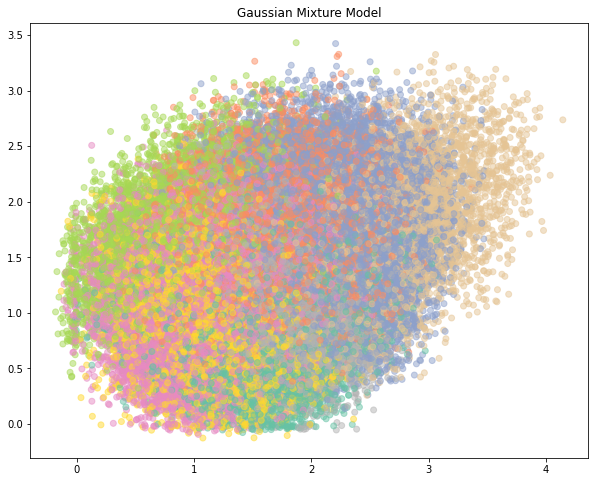

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 8)
gmm.fit(pred)
gmm_labels = gmm.predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.39208989093851193


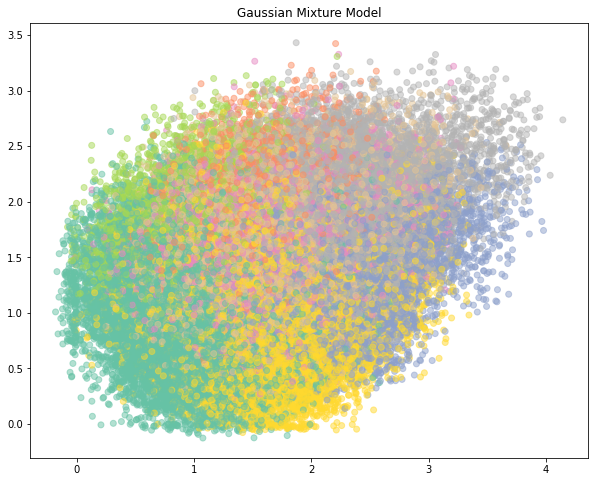

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 8, covariance_type='tied')
gmm.fit(pred)
gmm_labels = gmm.predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.37916124044700916


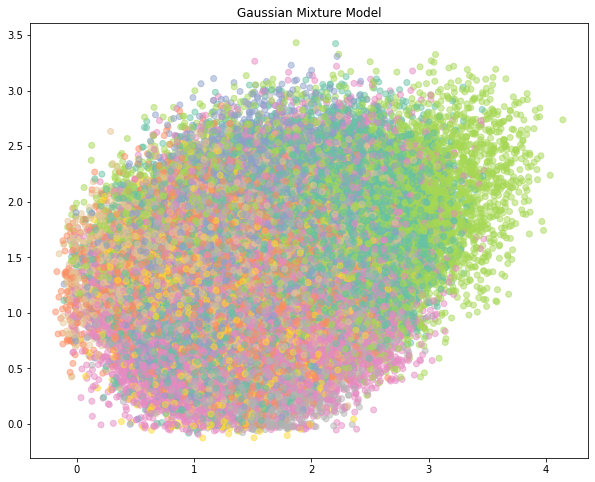

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 30)
gmm.fit(pred)
gmm_labels = gmm.predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.3562579678426087


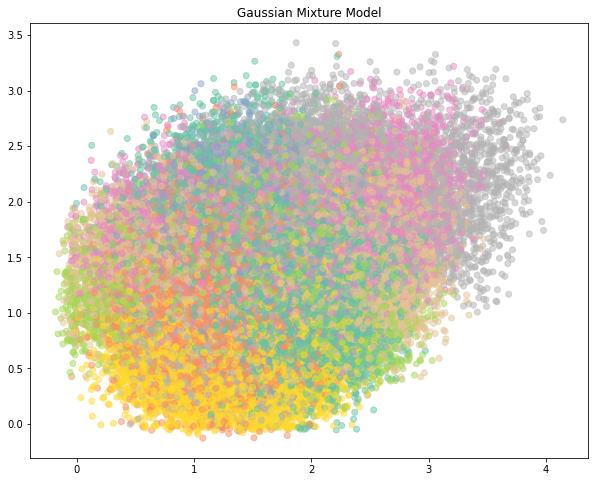

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 30, covariance_type='tied')
gmm.fit(pred)
gmm_labels = gmm.predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

### For 25 Encoded Features

In [ ]:
input_df = Input( shape = (X_train.shape[1], ))
x = Dense(500, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(input_df)
x = Dense(100, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)
x = Dense(200, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)
encoded = Dense(25, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)

x = Dense(200, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(encoded)
x = Dense(100, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation = 'LeakyReLU', kernel_initializer='glorot_uniform')(x)
decoded = Dense(X_train.shape[1], kernel_initializer='glorot_uniform')(x)

autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(X_train, X_train, batch_size= 100, epochs = 10, verbose = 1)

Epoch 1/10
1000/1000 [==============================] - 45s 44ms/step - loss: 0.0022
Epoch 2/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0013
Epoch 3/10
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0010
Epoch 4/10
1000/1000 [==============================] - 32s 32ms/step - loss: 9.4291e-04
Epoch 5/10
1000/1000 [==============================] - 33s 33ms/step - loss: 8.8887e-04
Epoch 6/10
1000/1000 [==============================] - 32s 32ms/step - loss: 8.4572e-04
Epoch 7/10
1000/1000 [==============================] - 33s 33ms/step - loss: 8.1285e-04
Epoch 8/10
1000/1000 [==============================] - 33s 33ms/step - loss: 7.8490e-04
Epoch 9/10
1000/1000 [==============================] - 33s 33ms/step - loss: 7.6401e-04
Epoch 10/10
1000/1000 [==============================] - 33s 33ms/step - loss: 7.4988e-04


In [ ]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1572)]            0         
                                                                 
 dense_16 (Dense)            (None, 500)               786500    
                                                                 
 dense_17 (Dense)            (None, 100)               50100     
                                                                 
 dense_18 (Dense)            (None, 200)               20200     
                                                                 
 dense_19 (Dense)            (None, 25)                5025      
                                                                 
 dense_20 (Dense)            (None, 200)               5200      
                                                                 
 dense_21 (Dense)            (None, 100)               2010

In [ ]:
pred = encoder.predict(X_train)
pred.shape

(100000, 25)

In [ ]:
pred

array([[ 1.0026541 ,  0.678457  , -0.2602196 , ...,  1.2586929 ,
         0.8100665 ,  0.64780396],
       [ 0.941001  ,  0.76289546, -0.5101538 , ...,  0.5060667 ,
         1.1112753 ,  0.7340854 ],
       [ 0.9334896 ,  1.1019428 , -0.37260243, ...,  0.9317341 ,
         0.88195664,  1.2151554 ],
       ...,
       [ 1.3116158 ,  1.5703294 , -0.23936374, ...,  1.4689097 ,
         1.2809104 ,  0.59400964],
       [ 1.5524378 ,  0.32747254, -0.59579176, ...,  0.6820533 ,
         0.7630207 ,  1.6331624 ],
       [ 1.0673714 ,  0.25113076, -0.59949714, ...,  1.0138556 ,
         0.9224105 ,  0.64774966]], dtype=float32)

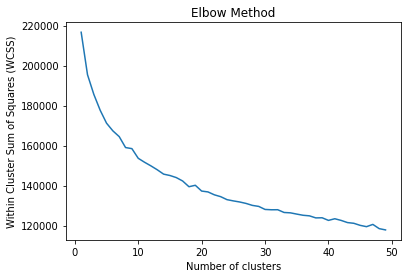

In [ ]:
# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 50):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(pred)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

0.1568030428078115


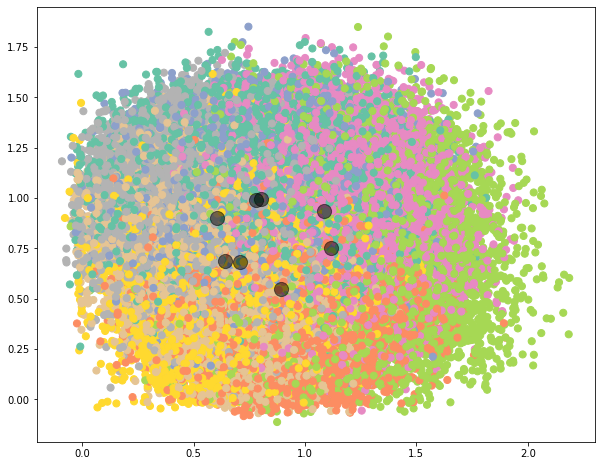

In [ ]:
kmeans = cluster.MiniBatchKMeans(n_clusters = 8,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, pred_y))
# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c=pred_y, s=50, cmap='Set2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

0.3634970773990122


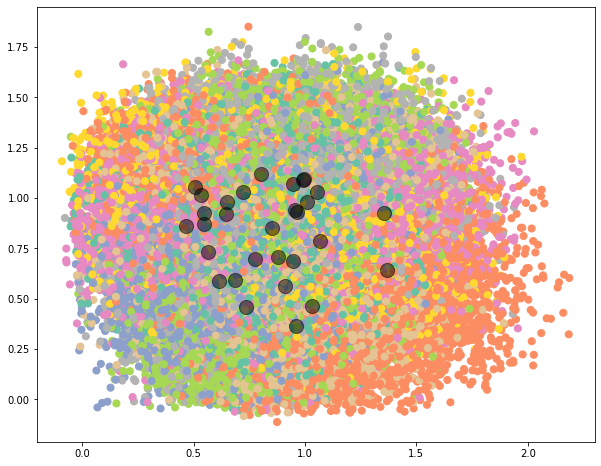

In [ ]:
kmeans = cluster.MiniBatchKMeans(n_clusters = 30,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, pred_y))
# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c=pred_y, s=50, cmap='Set2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

0.2668108579850239


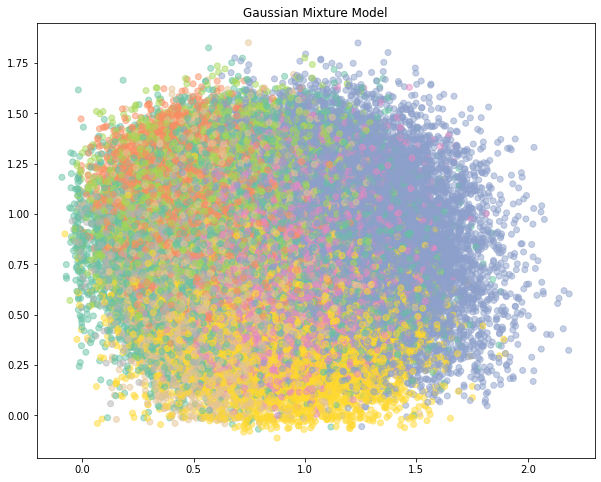

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 8)
gmm.fit(pred)
gmm_labels = gmm.predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.05322383714695304


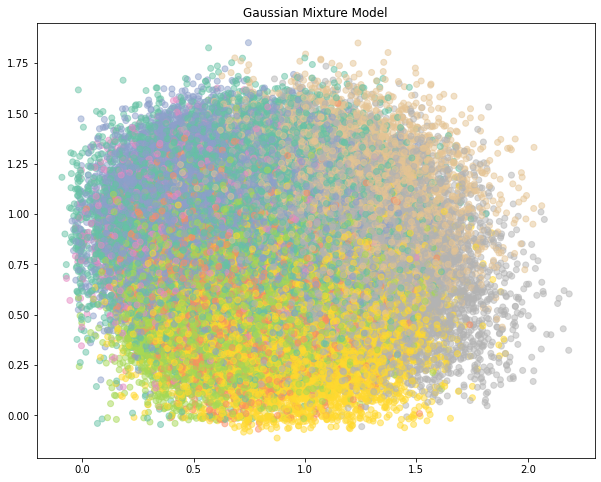

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 8, covariance_type='tied')
gmm.fit(pred)
gmm_labels = gmm.predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.473798343466329


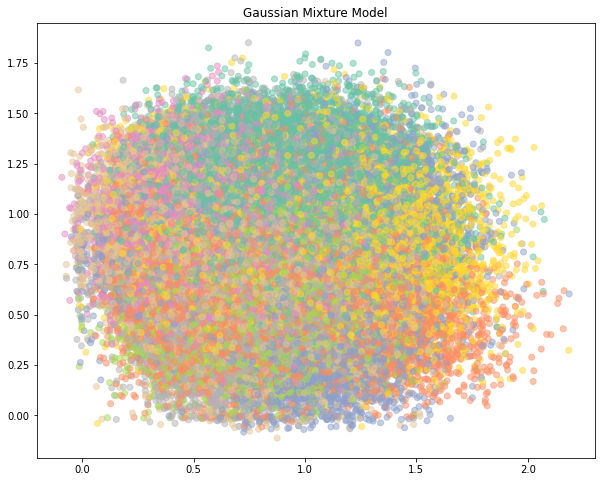

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 30)
gmm.fit(pred)
gmm_labels = gmm.predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 30, covariance_type='tied')
gmm.fit(pred)
gmm_labels = gmm.predict(pred)
# NMI Metrics
print(metrics.normalized_mutual_info_score(y_train, gmm_labels))
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c = gmm_labels, cmap = 'Set2', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

0.7737602136058473
